# Ecuaciones de Lorenz
Un modelo simple basado en la dinámica de fluidos atmosféricos es representado mediante las ecuaciones de Lorenz, desarrollado por el meteorólogo Estadounidense Edward Lorenz:
\begin{eqnarray}
\frac{dx}{dt}&=&-\sigma x+\sigma y\\
\frac{dy}{dt}&=&rx-y-xz\\
\frac{dz}{dt}&=&-bz+xy
\end{eqnarray}
Lorenz desarrolló estas ecuaciones para representar la intensidad de movimiento de un fluido atmosférico. Donde $x$ representa la intensidad de movimiento convectivo, $y$ representa  la diferencia de temperatura horizontal en una celda de convección. Y $z$ representando lo que se aleja de la linealidad el perfil vertical de temperaturas del gas. Los parámetros $\sigma$, $r$ y $b$ son constantes que dependen de la viscosidad y la difusividad térmica del fluído.

---

Referencias:

- [El atractivo de Lorenz - Cuentos cuánticos](https://cuentos-cuanticos.com/2016/10/03/el-atractivo-de-lorenz/)
- [Número de Prandtl](https://es.wikipedia.org/wiki/N%C3%BAmero_de_Prandtl)
- [Número de Rayleigh](https://es.wikipedia.org/wiki/N%C3%BAmero_de_Rayleigh)

---
Usando $\sigma=10$, $b=\frac{8}{3}$ y $r=28$; condiciones iniciales $x_0=y_0=z_0=5$; encuentre la solución numérica y grafique.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def eq_lorenz(t,V,s=10,b=8/3,r=28):
  dV=np.zeros(3) # Regresa un arreglo de 3 ceros
  x=V[0]
  y=V[1]
  z=V[2]

  dV[0]=-s*x+s*y # dx/dt
  dV[1]=r*x-y-x*z # dy/dt
  dV[2]=-b*z+x*y # dz/dt
  return dV

In [3]:
t_span=(0,15)
V0=np.array([5,5,5])
sol=solve_ivp(eq_lorenz,t_span,V0,max_step=0.01)
sol.y.shape

(3, 1502)

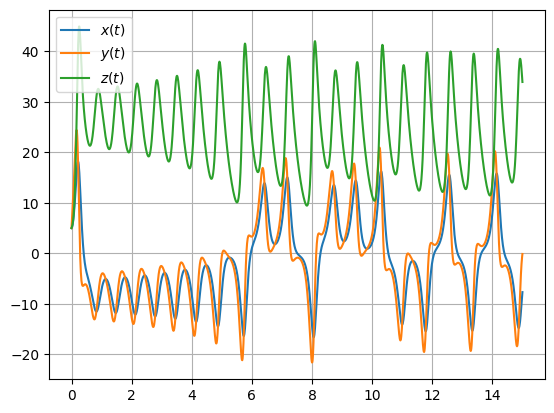

In [4]:
tags=('$x(t)$','$y(t)$','$z(t)$')
for i in range(3):
  plt.plot(sol.t,sol.y[i,:],label=tags[i])
plt.legend()
plt.grid()

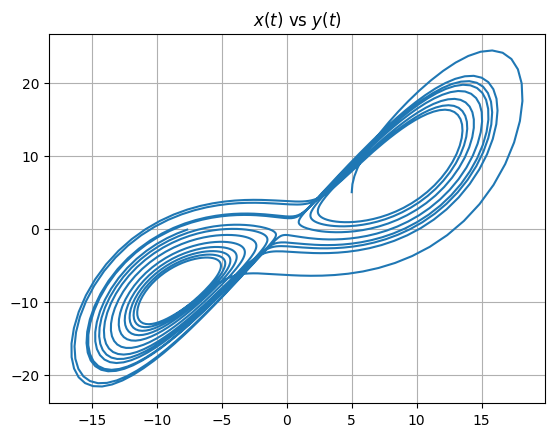

In [5]:
plt.plot(sol.y[0,:],sol.y[1,:])
plt.title('$x(t)$ vs $y(t)$')
plt.grid()

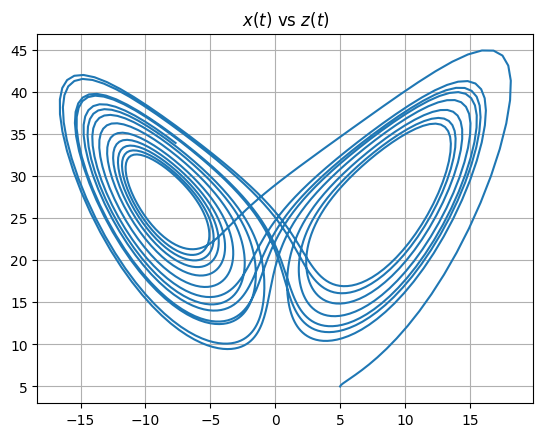

In [6]:
plt.plot(sol.y[0,:],sol.y[2,:])
plt.title('$x(t)$ vs $z(t)$')
plt.grid()

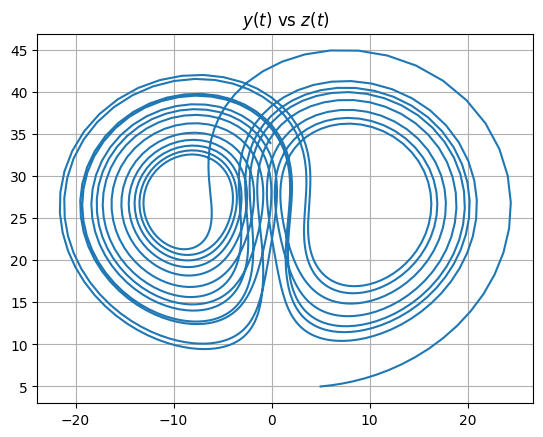

In [7]:
plt.plot(sol.y[1,:],sol.y[2,:])
plt.title('$y(t)$ vs $z(t)$')
plt.grid()